In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [31]:
raw_df = pd.read_csv("./data/breast-cancer-train.csv")
raw_df 

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,0-4,0-2,no,3,left,central,no
1,no-recurrence-events,50-59,ge40,25-29,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,lt40,10-14,0-2,no,1,left,right_up,no
3,no-recurrence-events,50-59,ge40,25-29,0-2,no,3,left,right_up,no
4,no-recurrence-events,40-49,premeno,30-34,0-2,no,3,left,left_up,no
...,...,...,...,...,...,...,...,...,...,...
137,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
138,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
139,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
140,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [41]:
# 初始化数据
raw_df.to_csv('初始化数据.csv', index = None)

In [26]:
data = raw_df

<AxesSubplot:ylabel='count'>

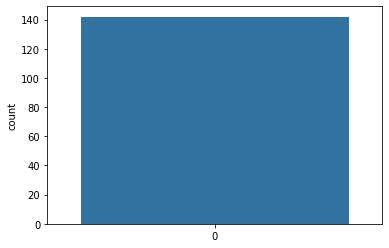

In [35]:
# 癌症和癌症费的分布
# 用于画条形图
# inv-nodes值
sns.countplot(data['deg-malig'], label ='Class')

In [29]:
# 划分数据集和测试集
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

(99, 10)
(43, 10)


In [37]:
train_x = train.columns[1:9]
train_y = train.Class

In [40]:
# 极度随机树
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(train_x, train_y)
clf.feature_importances

ValueError: could not convert string to float: 'age'

In [34]:
prediction_var = [k for k, v in fea_dict if v > 0.02]
prediction_var

NameError: name 'fea_dict' is not defined

In [ ]:
Corr = data[prediction_var].corr()
plt.figure(figsize=(14, 14)）
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f', rannot_kws={'size': 15},
           xticklabels = prediction_var, yticklabels= prediction_var, 
           cmap = 'coolwarm')

In [ ]:
# 划分数据集 和 测试集
train, test = train_test_spilt(data, test_size = 0.3)
print(train.shape)
print(test.shape)

In [ ]:
x_train = train[prediction_var]
y_train = train.diagnosis
x_test = test[prediction_var]
y_test = test.diagnosis

In [ ]:
# 用交叉验证法选择 随机森林回归 'n_estimators' 最优的参数
from sklearn.ensemble import RandomForestRegressor, RandomForestclassifier
from sklearn.model_selection import GridSearchcv#网格授索
rf = RandomForestClassifier(random_state = 10)
time1 = time.time(）
param_1 ={'n_estimators':list(range(400, 1000, 100))}
model_1 = GridSearchCV(estimator = rf, param_grid = param_1, cv=5, n_jobs=-1)
model_1.fit(x_train,y_train)
print("model1最好的分数：{}".format(model_1.best_score_)）
print("model1最好的参数：{}".format(mode1_1.best_params_)）
print("model1消耗时间time=".(time.time()-time1)) #时间大概60
print("model1测试集的分数：{}".format(model_1.score(x_test,y_test))

In [ ]:
# 2. 决策树回归
from sklearn import tree
time1 = time.time()
param_2-{'max_depth':list(range(10,100,10)),'min_samples_leaf':list(range(1,10))}
model_2=Gridsearchcv(estimator = tree.Decisionrreeclassifier(random_state=10),param_grid - param_2, n_jobs--1, cv=5)
model_2.fit(x_train,y_train)
print("model2最好的分数：{}".format(model_2.best_score_)）
print("model2最好的参数：{}".format(mode1_2.best_params_)）
print("model2消耗时间time=".(time.time()-time1)) #时间大概60
print("model2测试集的分数：{}".format(model_2.score(x_test,y_test))

In [ ]:
# 3.KNN回归
from sklearn import neighbors
time1 = time.time(）
param_3={'n_neighbors':[i for i in range(1,11)], 'p':[i for i in range(1,6)]} 
model_3=GridSearchCV(estimator = neighbors.KNeighborsClassifier(), param_grid = param 3, n_jobs=-1, cv=5)
model_3.fit(x_train,y_train)
print("model3最好的分数：{}".format(model_3.best_score_)）
print("model3最好的参数：{}".format(mode1_3.best_params_)）
print("model3消耗时间time=".(time.time()-time1)) #时间大概60
print("model3测试集的分数：{}".format(model_3.score(x_test,y_test))

In [ ]:
# 4.逻辑回归
from sklearn.linear model import LogisticRegression
time1 = time.time()
param_4={'C':[1, 2, 4], 'penalty':['11',"12"]}
model_4=GridSearchcV(estimator = LogisticRegression(), param_grid = param_4, n_jobs=1, cv=5)
model_4.fit(x_train, y_train)
print("model4最好的分数：{}".format(model_4.best_score_)）
print("model4最好的参数：{}".format(mode1_4.best_params_)）
print("model4消耗时间time=".(time.time()-time1)) #时间大概60
print("model4测试集的分数：{}".format(model_4.score(x_test,y_test))

In [ ]:
# 5. 梯度提升
from sklearn.ensemble import GradientBoostingClassifier
time1 = time.time()
param_5 = {'n_estimators':list(range(100, 600, 50))}
model_5 = GridSearchcV(estimator = GradientBoostingClassifier(), param_grid = param_5, n_jobs=-1, cv=5)
model_5.fit(x_train,y_train)
print("model5最好的分数：{}".format(model_5.best_score_)）
print("model5最好的参数：{}".format(mode1_5.best_params_)）
print("model5消耗时间time=".(time.time()-time1)) #时间大概248s分钟
print("model5测试集的分数：{}".format(model_5.score(x_test,y_test))

In [ ]:
# 5. SVC
from sklearn.svm import SVC
time1 = time.time()
param_6=('gamma':np.linspace(0, 0.001, 100)
model_6=GridsearchCV(estimator = SVC(kernel = 'rbf'), param_grid = param_6, n_jobs=-1,cv=5)
model_6.fit(x_train,y_train)
print("model6最好的分数：{}".format(model_6.best_score_)）
print("model6最好的参数：{}".format(mode1_6.best_params_)）
print("model6消耗时间time=".(time.time()-time1)) #时间大概248s分钟
print("model6测试集的分数：{}".format(model_6.score(x_test,y_test))

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rcParams['font. sans-serif'] = ['SimHei'] #用黑体显示中文
plt.rcParams["font.family"] = "Arial Unicode MS'
plt.rcParamsl'figure.figsize']=(6.0, 4.0)
plt.rcParams['savefig.dpi']= 200 #图片像素
plt.rcParams['figure.dpi']= 200 #分辦率
# 默认的像素：16.0,4.0]，分辦率为100，图片尺寸为 6005400
# 指定dpi=200，图片尺寸为 1200*800
# 指定dpi=300，图片尺寸为 1800*1200
# 设置figsize可以在不改变分辦率情况下改变比例

x = ['随机森林', "决策树’, 'KNN回归', '逻辑回归', '梯度提升', 'SVC',]
y1 = [model_1.best_score_,model_2.best_score_,mode1_3.best_score_,
      model_4.best_score_,model_5.best_score_,mode1_6.best_score_,
     ]
y1 = [round(item, 4) for item in y1]
plt.plot(x, y1, marker=’*’, ms=5, label= "a")
plt.xticks(rotation=45)
plt.xlabel("模型"）
plt.ylabel("准确率"）
plt.title("乳腺癌分类"）
plt.legend(loc="upper left")
plt.savefig("a.jpg")
plt.show(）

In [ ]:
import joblib